NAME :- SAMAR PRAKAS
Task2 : Prediction using Unsupervised ML
Data Science and Business Analytics (GRIP May21)

In [4]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv('Iris.csv')
print('data imported')

data imported


Exploring and Understanding our data

In [2]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.shape

(150, 6)

In [7]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.describe()#statistical description of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.dtypes #data types

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
iris = iris.drop(['Id'],axis = 1) #axis=1 => column
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris['Species'].value_counts()  #for unique categorial data

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [13]:
# Cleaning the data
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
iris.duplicated().sum() #checking duplicate values

3

In [15]:
iris[iris.duplicated()] #This shows the actual duplicate rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Visualizing the Data

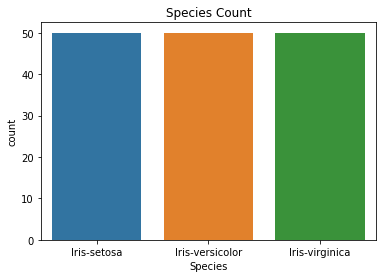

In [18]:
plt.title('Species Count')
sns.countplot(iris['Species'])
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

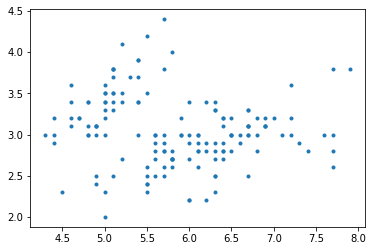

In [19]:
# creating a scatter plot of features 
plt.plot(iris['SepalLengthCm'],iris["SepalWidthCm"],marker='.',linestyle='none')
plt.show()

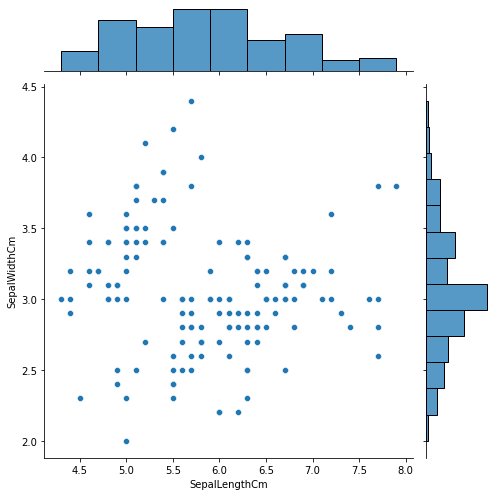

In [20]:
# using the seaborn library to create a similar plot
#Comparison between sepal width and length
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=7)

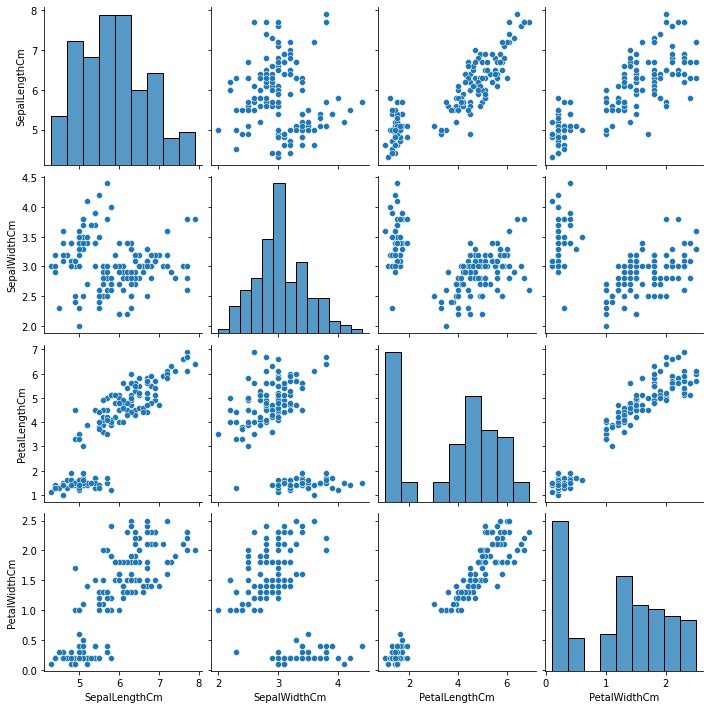

In [21]:
#plotting multiverate plots
#plot the pairwise plot of multiple features/variable in a grid format
sns.pairplot(data = iris)

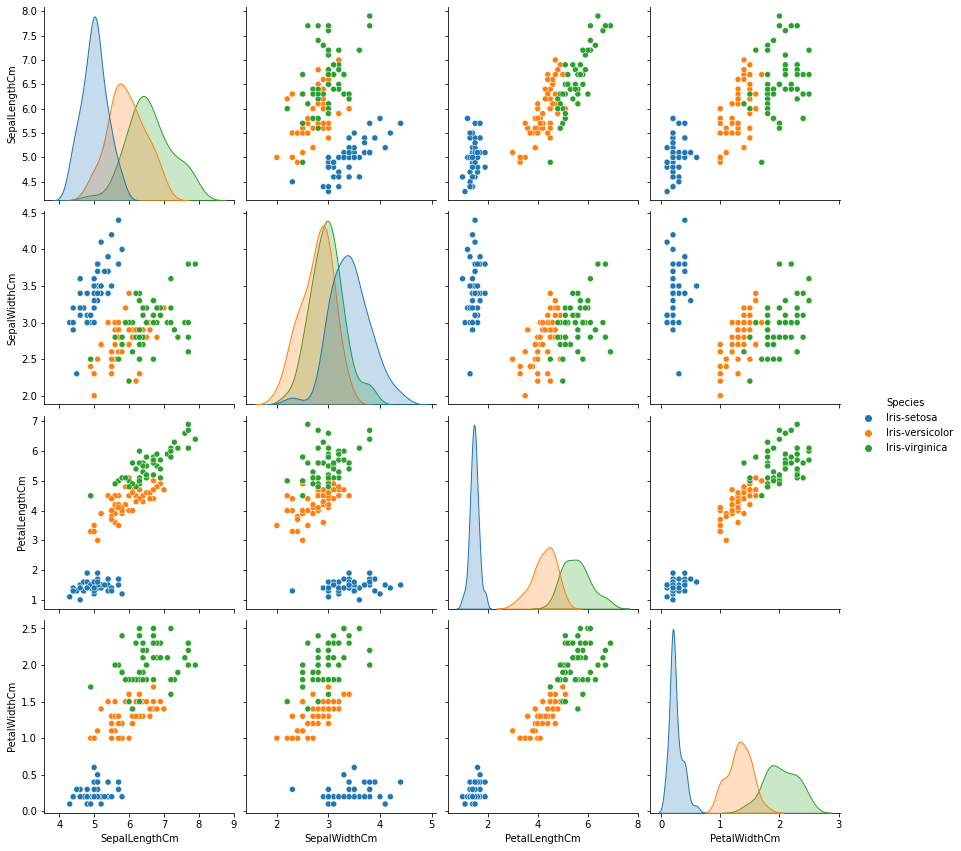

In [22]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris, hue="Species", height=3, diag_kind="kde")

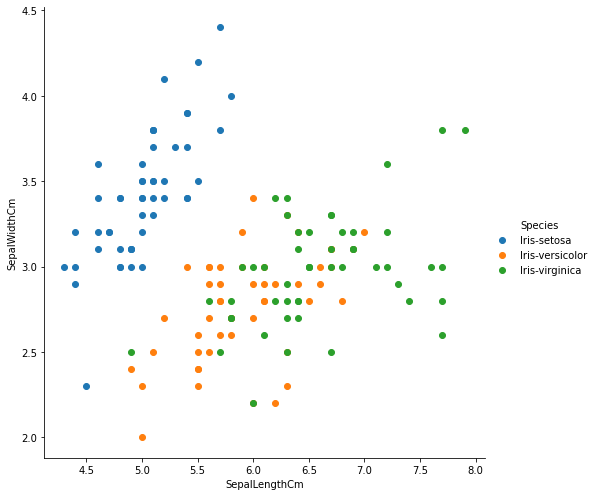

In [23]:
# using seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", height=7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

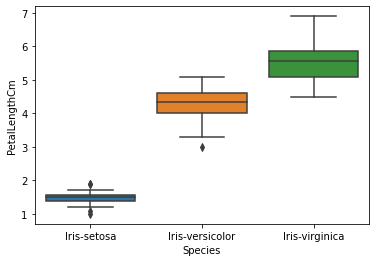

In [24]:
# the boxplot feature of seaborn is also useful to look at individual features
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

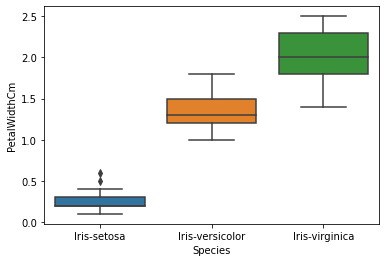

In [25]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

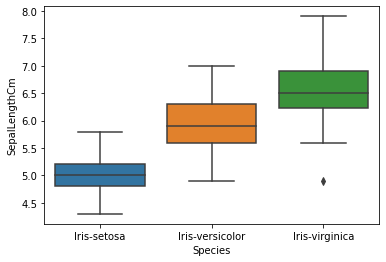

In [26]:
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

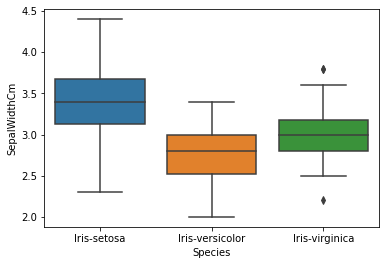

In [27]:
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

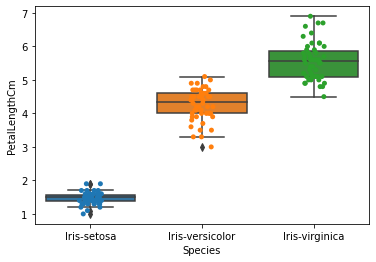

In [28]:
# using Seaborn's striplot function adds a layer of individual points
# setting jitter=True ensures that not all points fall on the same line
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes (this is neat thing to learn:)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

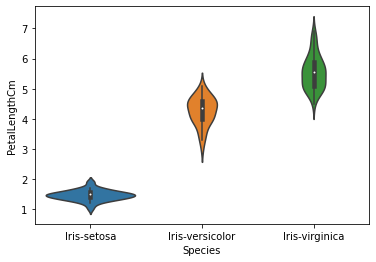

In [29]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

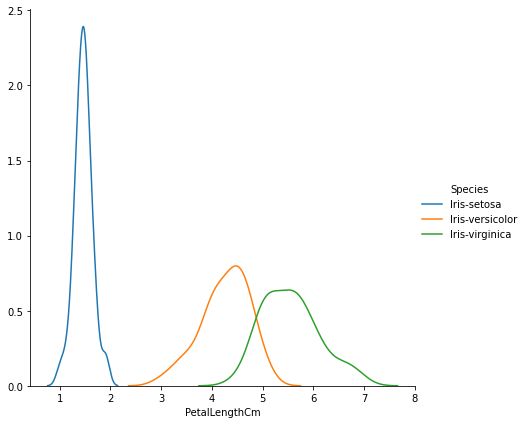

In [30]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [31]:
#Correlation Between Variables
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


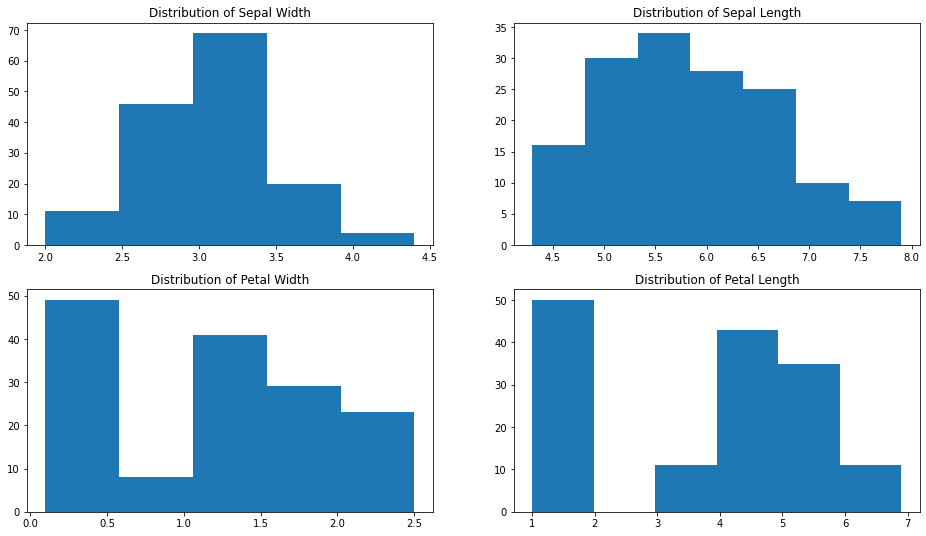

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris['SepalWidthCm'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris['SepalLengthCm'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris['PetalWidthCm'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris['PetalLengthCm'], bins=6);

Conclusion
1.) The dataset is balanced i.e. equal records are present for all three species.
2.) We have four numerical columns while just one categorical column which in turn is our target column.
3.) A strong correlation is present between petal width and petal length.
4.) The setosa species is the most easily distinguishable because of its small feature size.
5.) The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has         average feature sizes and virginica has larger feature sizes.

Preparing the dataset

In [35]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
x = iris.iloc[:, [0, 1, 2, 3]].values

#Finding the optimum number of clusters for k-means classification

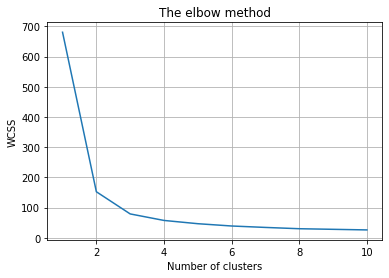

In [41]:
from sklearn.cluster import KMeans
wcss = []
a = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    a.append(i)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(a, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.grid()
plt.show()

In [42]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

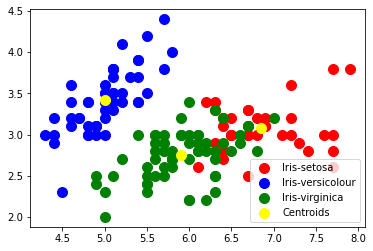

In [43]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()